<a href="https://colab.research.google.com/github/arpit0891/Stock-price-predection-using-LSTM-and-Sentiment-analysis/blob/main/Stock_Marke_LSTM_Yahoo_datat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import os


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = '/content/drive/My Drive/Data_science/Input'

The dataset is tanken from https://in.finance.yahoo.com/

Any stock dataset you want to add in the website can be taken from the website given above then traing the model on that dataset

In [ ]:
for dirname, _, filenames in os.walk(data):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Data_science/Input/AXISBANK.csv
/content/drive/My Drive/Data_science/Input/INDUSINDBK (2).csv
/content/drive/My Drive/Data_science/Input/NIFTY50_all (1).csv
/content/drive/My Drive/Data_science/Input/BRITANNIA.csv
/content/drive/My Drive/Data_science/Input/INDUSINDBK (1).csv
/content/drive/My Drive/Data_science/Input/INDUSINDBK.csv
/content/drive/My Drive/Data_science/Input/VEDL.csv
/content/drive/My Drive/Data_science/Input/UPL.csv
/content/drive/My Drive/Data_science/Input/TATASTEEL.csv
/content/drive/My Drive/Data_science/Input/POWERGRID (1) (1).csv
/content/drive/My Drive/Data_science/Input/TCS.csv
/content/drive/My Drive/Data_science/Input/POWERGRID (1).csv
/content/drive/My Drive/Data_science/Input/POWERGRID.csv
/content/drive/My Drive/Data_science/Input/stock_metadata.csv
/content/drive/My Drive/Data_science/Input/BAJAJFINSV.csv
/content/drive/My Drive/Data_science/Input/BHARTIARTL.csv
/content/drive/My Drive/Data_science/Input/TECHM.csv
/content/drive/My

In [ ]:

import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

import matplotlib.pyplot as plt

import numpy as np

from sklearn.preprocessing import MinMaxScaler

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
print(data)

/content/drive/My Drive/Data_science/Input


In [ ]:
#drive.mount('/content/drive')
data = '/content/drive/My Drive/Data_science/Input/HDFCBANK.csv'

In [ ]:
df = pd.read_csv(data)

#print the head
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


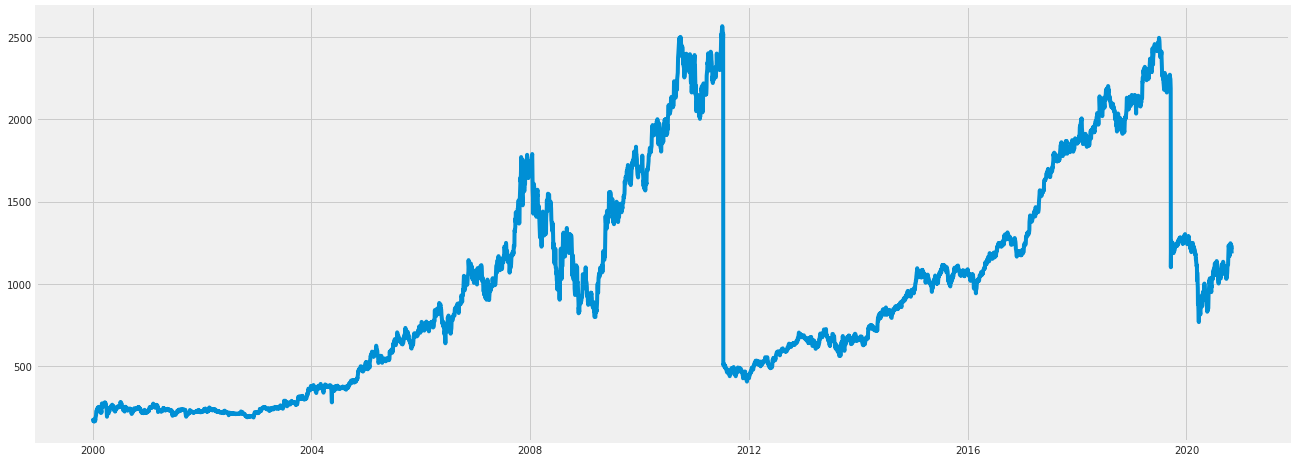

In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(20,8))
plt.plot(df['Close'], label='Close Price')

The sudden drop as seen on the graph was due to dilution in the shares. Later we tackled this problem by taking standard price for the complete graph

In [ ]:
features = ["Date", "Close"]
all_data = df[features]
all_data.index = all_data.Date
all_data.drop('Date', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
all_data.head()
all_data.shape

(5184, 1)

Preprocessing the data

In [ ]:
dataset = all_data.values
train = dataset[2000:4500,:]
valid = dataset[4500:,:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
x_train, y_train = [], []
for i in range(90,len(train)):
    x_train.append(scaled_data[i-90:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
#we take the 90 days dataset and predict the 91st day
#Code for making csv for it will be reflected during the presentation part where
#We created a front end and backend to use the model we made here

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
inputs = all_data[len(all_data) - len(valid)-90:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
inputs.shape
X_test = []
for i in range(90,inputs.shape[0]):
    X_test.append(inputs[i-90:i,0])
X_test = np.array(X_test)



Initializing the LSTM model and 2nd, 3rd and 4th LSTM layer each with a Dropout Layer. The layers contain 50 neurons and with a Dropout rate of 20%, twenty percent of 50 neurons will be ignored randomly during each iteration

Finally, an output layer is added with 1 as an output dimension (as we are predicting the close price)


We use Stochastic Gradient Descent algorithm to compile the model and use mean squared error ad loss function




# **Making the model**

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(rate = 0.3))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.3))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.3))

model.add(LSTM(units=50, return_sequences = False))
model.add(Dropout(rate = 0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#we use standard adam's optimizer

We train the model for 100 epochs

In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=128, verbose=1)

Epoch 1/100
19/19 [==============================] - 6s 316ms/step - loss: 0.0177
Epoch 2/100
19/19 [==============================] - 6s 306ms/step - loss: 0.0037
Epoch 3/100
19/19 [==============================] - 6s 314ms/step - loss: 0.0028
Epoch 4/100
19/19 [==============================] - 6s 309ms/step - loss: 0.0025
Epoch 5/100
19/19 [==============================] - 6s 301ms/step - loss: 0.0023
Epoch 6/100
19/19 [==============================] - 6s 302ms/step - loss: 0.0021
Epoch 7/100
19/19 [==============================] - 6s 300ms/step - loss: 0.0021
Epoch 8/100
19/19 [==============================] - 6s 304ms/step - loss: 0.0020
Epoch 9/100
19/19 [==============================] - 6s 300ms/step - loss: 0.0016
Epoch 10/100
19/19 [==============================] - 6s 302ms/step - loss: 0.0018
Epoch 11/100
19/19 [==============================] - 6s 301ms/step - loss: 0.0018
Epoch 12/100
19/19 [==============================] - 6s 299ms/step - loss: 0.0017
Epoch 13/100


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
preds = model.predict(X_test)
preds = scaler.inverse_transform(preds)

In [ ]:
preds

array([[1860.7931 ],
       [1873.4762 ],
       [1885.3752 ],
       [1896.6423 ],
       [1907.0784 ],
       [1916.5928 ],
       [1924.486  ],
       [1928.8982 ],
       [1927.8958 ],
       [1920.6449 ],
       [1907.2632 ],
       [1889.5138 ],
       [1868.9584 ],
       [1848.3066 ],
       [1830.1648 ],
       [1816.288  ],
       [1807.3612 ],
       [1803.2184 ],
       [1802.6735 ],
       [1804.2268 ],
       [1806.4949 ],
       [1809.3258 ],
       [1813.5947 ],
       [1819.4292 ],
       [1825.8643 ],
       [1831.5519 ],
       [1835.4032 ],
       [1836.2542 ],
       [1833.4164 ],
       [1827.7405 ],
       [1820.4839 ],
       [1813.3778 ],
       [1807.5183 ],
       [1803.5867 ],
       [1802.2268 ],
       [1802.6956 ],
       [1803.8988 ],
       [1804.7528 ],
       [1805.2048 ],
       [1805.7008 ],
       [1805.8358 ],
       [1806.7892 ],
       [1809.3273 ],
       [1813.379  ],
       [1819.7343 ],
       [1828.001  ],
       [1836.267  ],
       [1843.

In [ ]:
valid

array([[1957.65],
       [1974.95],
       [1999.65],
       [1995.5 ],
       [2005.7 ],
       [1991.15],
       [1948.  ],
       [1913.85],
       [1896.8 ],
       [1872.8 ],
       [1880.95],
       [1849.5 ],
       [1876.65],
       [1883.15],
       [1881.9 ],
       [1878.6 ],
       [1878.2 ],
       [1863.2 ],
       [1857.4 ],
       [1853.2 ],
       [1880.55],
       [1911.55],
       [1902.55],
       [1884.2 ],
       [1874.35],
       [1869.95],
       [1846.25],
       [1832.6 ],
       [1852.85],
       [1851.05],
       [1867.25],
       [1860.25],
       [1864.5 ],
       [1880.8 ],
       [1853.  ],
       [1847.25],
       [1839.5 ],
       [1858.9 ],
       [1867.75],
       [1841.55],
       [1893.45],
       [1892.6 ],
       [1886.1 ],
       [1931.2 ],
       [1915.9 ],
       [1883.25],
       [1908.9 ],
       [1923.4 ],
       [1939.05],
       [1920.85],
       [1918.85],
       [1928.8 ],
       [1925.  ],
       [1942.1 ],
       [1948.5 ],
       [19

In [ ]:
print(valid[-1],preds[-1])

[1183.55] [1211.7644]


In [ ]:
rms=np.sqrt(np.mean(np.power((valid-preds),2)))

In [ ]:
rms
#it is the standard deviation of the residuals (prediction errors)

109.3715626025248

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


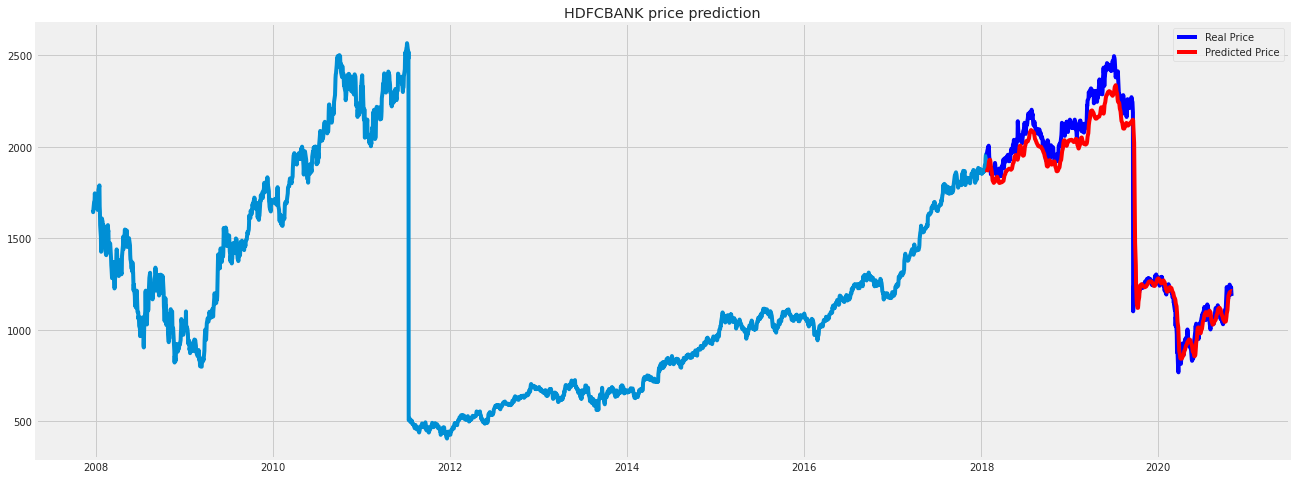

In [ ]:
train = all_data[2000:4500]
valid = all_data[4500:]
valid['Predictions'] = preds
plt.figure(figsize=(20,8))
plt.plot(train['Close'])
plt.plot(valid['Close'], color = 'blue', label = 'Real Price')
plt.plot(valid['Predictions'], color = 'red', label = 'Predicted Price')
plt.title('HDFCBANK price prediction')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

In [ ]:
df = pd.read_csv(data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5184 non-null   object 
 1   Symbol              5184 non-null   object 
 2   Series              5184 non-null   object 
 3   Prev Close          5184 non-null   float64
 4   Open                5184 non-null   float64
 5   High                5184 non-null   float64
 6   Low                 5184 non-null   float64
 7   Last                5184 non-null   float64
 8   Close               5184 non-null   float64
 9   VWAP                5184 non-null   float64
 10  Volume              5184 non-null   int64  
 11  Turnover            5184 non-null   float64
 12  Trades              2334 non-null   float64
 13  Deliverable Volume  4675 non-null   float64
 14  %Deliverble         4675 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 607.6

In [ ]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5.184000e+03,5.184000e+03,2334.000000,4.675000e+03,4675.000000
mean,996.597290,996.897955,1009.320679,983.409587,996.805883,996.795235,996.390808,1.901490e+06,2.144259e+14,74504.353042,1.164452e+06,0.598526
std,639.324343,638.966383,644.991685,633.027057,639.254264,639.223311,639.020034,3.744284e+06,4.317437e+14,86516.143550,1.975154e+06,0.120262
min,157.400000,162.150000,167.900000,157.000000,163.000000,163.400000,161.400000,1.042000e+03,2.291142e+10,807.000000,4.631000e+03,0.177900
25%,468.312500,469.875000,475.600000,461.875000,470.000000,469.112500,468.962500,2.917712e+05,1.505309e+13,26230.750000,2.551265e+05,0.524900
50%,911.600000,915.025000,930.825000,893.325000,912.200000,911.750000,911.855000,9.077695e+05,1.109204e+14,41848.500000,6.098440e+05,0.604300
75%,1384.362500,1390.000000,1409.450000,1360.000000,1388.100000,1384.362500,1384.995000,2.008752e+06,2.051019e+14,86674.750000,1.331341e+06,0.676200
max,2565.800000,2566.000000,2583.300000,2553.700000,2563.000000,2565.800000,2570.700000,1.005650e+08,1.426400e+16,790631.000000,6.669683e+07,1.000000


In [ ]:
from keras.models import load_model
model.save('HDFCBANK.h5')  # creates a HDF5 file 

In [ ]:
!ls

adc.json  HDFCBANK.h5  sample_data   TITAN.h5
drive	  my_model.h5  tatasteel.h5  WIPRO.h5


In [ ]:
from google.colab import files
files.download("HDFCBANK.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>